# 全流程分类任务

In [57]:
import pandas as pd
data = pd.read_csv("/Users/tianjian/Projects/python-BasicUsage2/算法/data/my_data_guest.csv")
data = data.drop(["id"],axis=1)
labels = ["bad"]

## Z-score

`normalize_df` 为onekey中正则化的API，将数据变化到0均值1方差。正则化的方法为

$column = \frac{column - mean}{std}$

In [58]:
from comp1 import normalize_df
data = normalize_df(data, not_norm=labels)
data = data.dropna(axis=1)
data.describe()

,bad,w_pct_cnt_to_black,w_app_cnt_m1,w_app_time_minus_update_time,w_cpa_rt_days,w_cpc_cnt_week_cv,w_cpc_mthly_call_02_cnt,w_be_not_familiar,w_d_7_cnt,w_cnt_applied_over_cnt_all,w_most_familiar_applied,w_d_30_cnt,w_rpt_org_m3
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.189000,1.776357e-17,3.019807e-17,7.105427e-18,2.309264e-17,-2.131628e-17,1.421085e-16,-6.394885e-17,9.947598e-17,-3.907985e-17,-3.552714e-17,3.907985e-17,4.618528e-17
std,0.391705,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-4.177894e+00,-2.105504e+00,-1.227402e+00,-1.208359e+00,-2.031939e+00,-7.003973e-01,-1.866506e+00,-2.861678e+00,-2.344942e+00,-5.260544e+00,-1.997754e+00,-2.310084e+00
25%,0.000000,-6.103758e-01,-6.430486e-01,-4.475714e-01,-3.901426e-01,-7.780005e-01,-7.003973e-01,-1.121187e+00,-3.069446e-01,-1.181084e+00,-1.007495e+00,-2.499308e-01,-2.460697e-01
50%,0.000000,4.528594e-01,2.005657e-01,-4.475714e-01,-3.901426e-01,5.524173e-02,-7.003973e-01,2.920834e-01,4.763673e-01,5.158845e-01,5.500481e-01,4.787076e-01,-2.460697e-01
75%,0.000000,4.528594e-01,1.001361e+00,8.849045e-01,1.544967e+00,9.416331e-01,7.625355e-01,2.920834e-01,4.763673e-01,5.158845e-01,5.500481e-01,9.349109e-01,7.756641e-01
max,1.000000,4.528594e-01,1.646045e+00,1.608808e+00,1.544967e+00,1.183306e+00,2.332373e+00,1.505099e+00,4.763673e-01,1.220214e+00,5.500481e-01,9.349109e-01,2.257091e+00


### 相关系数

计算相关系数的方法有3种可供选择
1. pearson （皮尔逊相关系数）: standard correlation coefficient

2. kendall (肯德尔相关性系数) : Kendall Tau correlation coefficient

3. spearman (斯皮尔曼相关性系数): Spearman rank correlation

三种相关系数参考：https://blog.csdn.net/zmqsdu9001/article/details/82840332

In [59]:
pearson_corr = data[[c for c in data.columns if c not in labels]].corr('pearson')
# kendall_corr = data[[c for c in data.columns if c not in labels]].corr('kendall')
# spearman_corr = data[[c for c in data.columns if c not in labels]].corr('spearman')

### 相关系数可视化

通过修改变量名，可以可视化不同相关系数下的相关矩阵。

**注意**：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

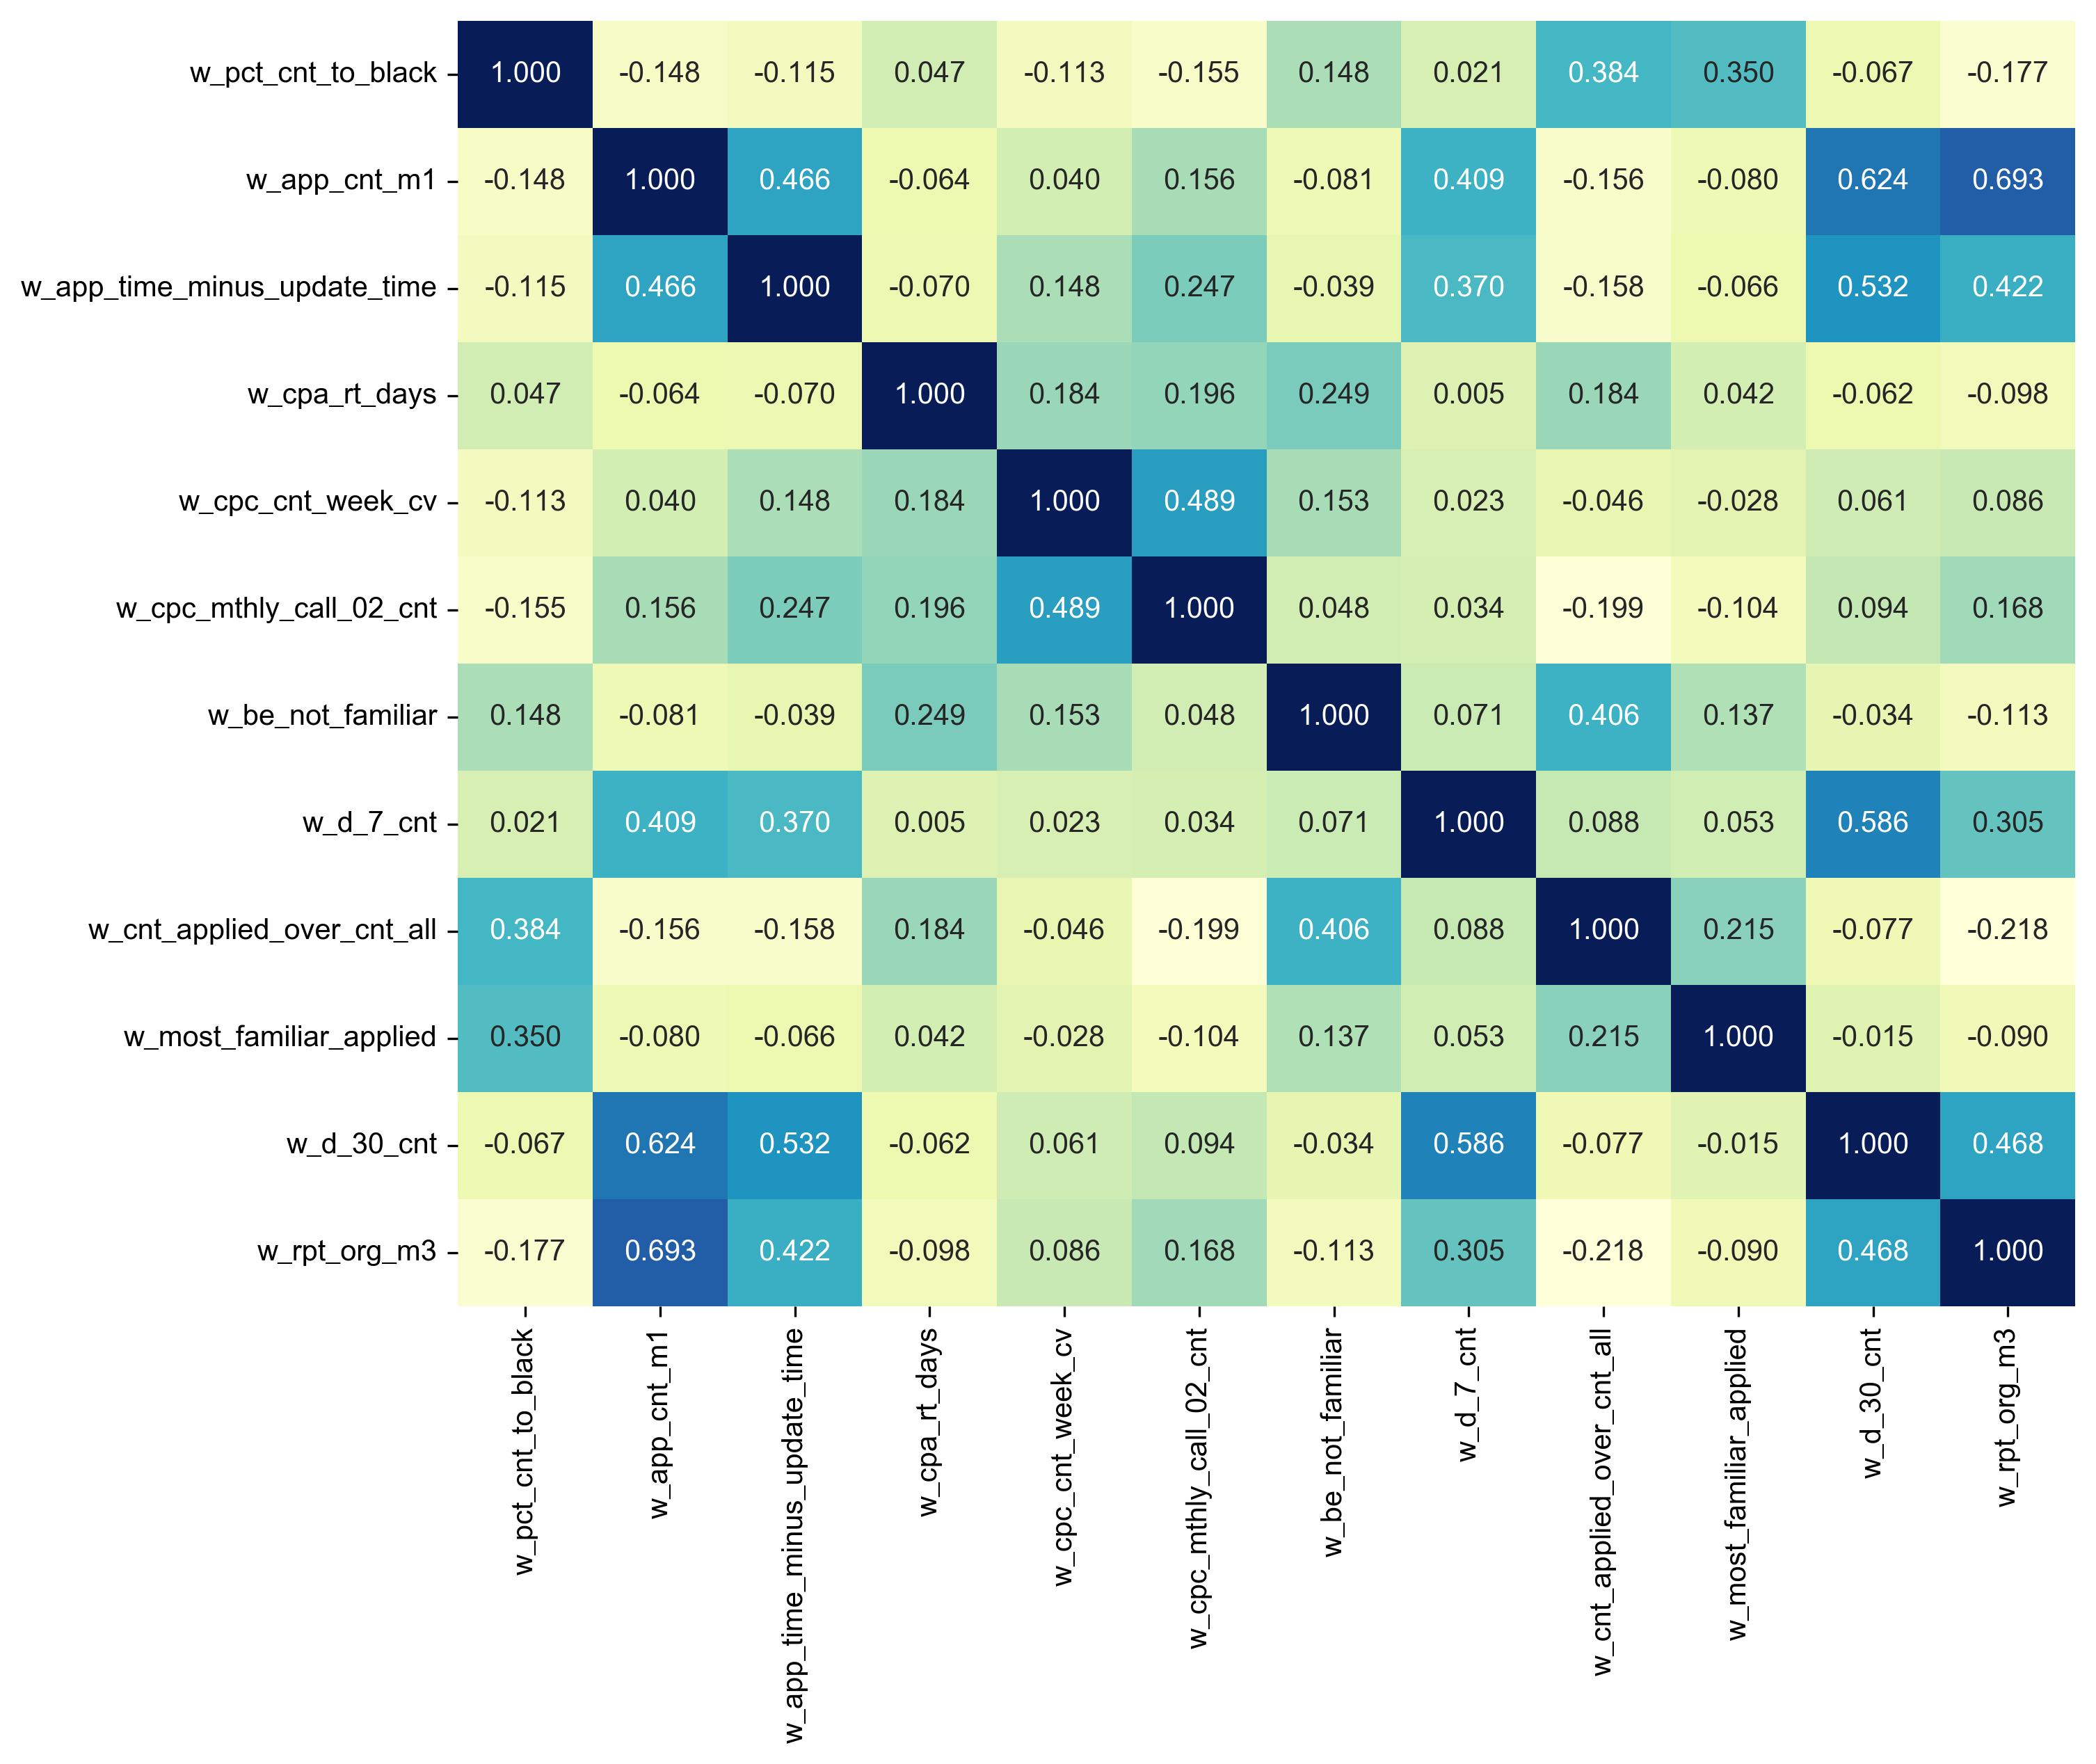

In [60]:
import seaborn as sns
from comp1 import draw_matrix
plt.figure(figsize=(10.0, 8.0))

# 选择可视化的相关系数
draw_matrix(pearson_corr, annot=True, cmap='YlGnBu', cbar=False)
# plt.savefig(f'img/feature_corr.svg', bbox_inches = 'tight')

### 聚类分析

通过修改变量名，可以可视化不同相关系数下的相聚类分析矩阵。

注意：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

pp = sns.clustermap(pearson_corr, linewidths=.5, figsize=(50.0, 40.0), cmap='YlGnBu')
plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
# plt.savefig(f'img/feature_cluster.svg', bbox_inches = 'tight')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 特征筛选 -- 相关系数

根据相关系数，对于相关性比较高的特征（一般文献取corr>0.9），两者保留其一。

In [62]:
from comp1 import select_feature
sel_feature = select_feature(pearson_corr, threshold=0.9, topn=10, verbose=False)
sel_feature += labels
sel_feature

['w_pct_cnt_to_black',
 'w_app_cnt_m1',
 'w_app_time_minus_update_time',
 'w_cpa_rt_days',
 'w_cpc_cnt_week_cv',
 'w_cpc_mthly_call_02_cnt',
 'w_be_not_familiar',
 'w_d_7_cnt',
 'w_cnt_applied_over_cnt_all',
 'w_most_familiar_applied',
 'w_d_30_cnt',
 'w_rpt_org_m3',
 'bad']

In [63]:
sel_data = data[sel_feature]
sel_data.describe()

,w_pct_cnt_to_black,w_app_cnt_m1,w_app_time_minus_update_time,w_cpa_rt_days,w_cpc_cnt_week_cv,w_cpc_mthly_call_02_cnt,w_be_not_familiar,w_d_7_cnt,w_cnt_applied_over_cnt_all,w_most_familiar_applied,w_d_30_cnt,w_rpt_org_m3,bad
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.776357e-17,3.019807e-17,7.105427e-18,2.309264e-17,-2.131628e-17,1.421085e-16,-6.394885e-17,9.947598e-17,-3.907985e-17,-3.552714e-17,3.907985e-17,4.618528e-17,0.189000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.391705
min,-4.177894e+00,-2.105504e+00,-1.227402e+00,-1.208359e+00,-2.031939e+00,-7.003973e-01,-1.866506e+00,-2.861678e+00,-2.344942e+00,-5.260544e+00,-1.997754e+00,-2.310084e+00,0.000000
25%,-6.103758e-01,-6.430486e-01,-4.475714e-01,-3.901426e-01,-7.780005e-01,-7.003973e-01,-1.121187e+00,-3.069446e-01,-1.181084e+00,-1.007495e+00,-2.499308e-01,-2.460697e-01,0.000000
50%,4.528594e-01,2.005657e-01,-4.475714e-01,-3.901426e-01,5.524173e-02,-7.003973e-01,2.920834e-01,4.763673e-01,5.158845e-01,5.500481e-01,4.787076e-01,-2.460697e-01,0.000000
75%,4.528594e-01,1.001361e+00,8.849045e-01,1.544967e+00,9.416331e-01,7.625355e-01,2.920834e-01,4.763673e-01,5.158845e-01,5.500481e-01,9.349109e-01,7.756641e-01,0.000000
max,4.528594e-01,1.646045e+00,1.608808e+00,1.544967e+00,1.183306e+00,2.332373e+00,1.505099e+00,4.763673e-01,1.220214e+00,5.500481e-01,9.349109e-01,2.257091e+00,1.000000


### 样本可视化

根据特征和label信息，将rad features降维到2维，看不同的label样本在二维空间的分布。

**注意**：由于特征空间维度极高，降维难免会有损失，所以二维的可视化仅供参考。

目前支持的:

| **降维方法** | **Method名称**                                                 |
| ------------ | ------------------------------------------------------------ |
| LLE      | Standard LLE, Modified LLE                                   |
| PCA      | t-SNE, NCA                                                      |
| SVD      | Truncated SVD                                              |
| Model Based      | Random projection, Isomap, MDS, Random Trees,Spectral       |

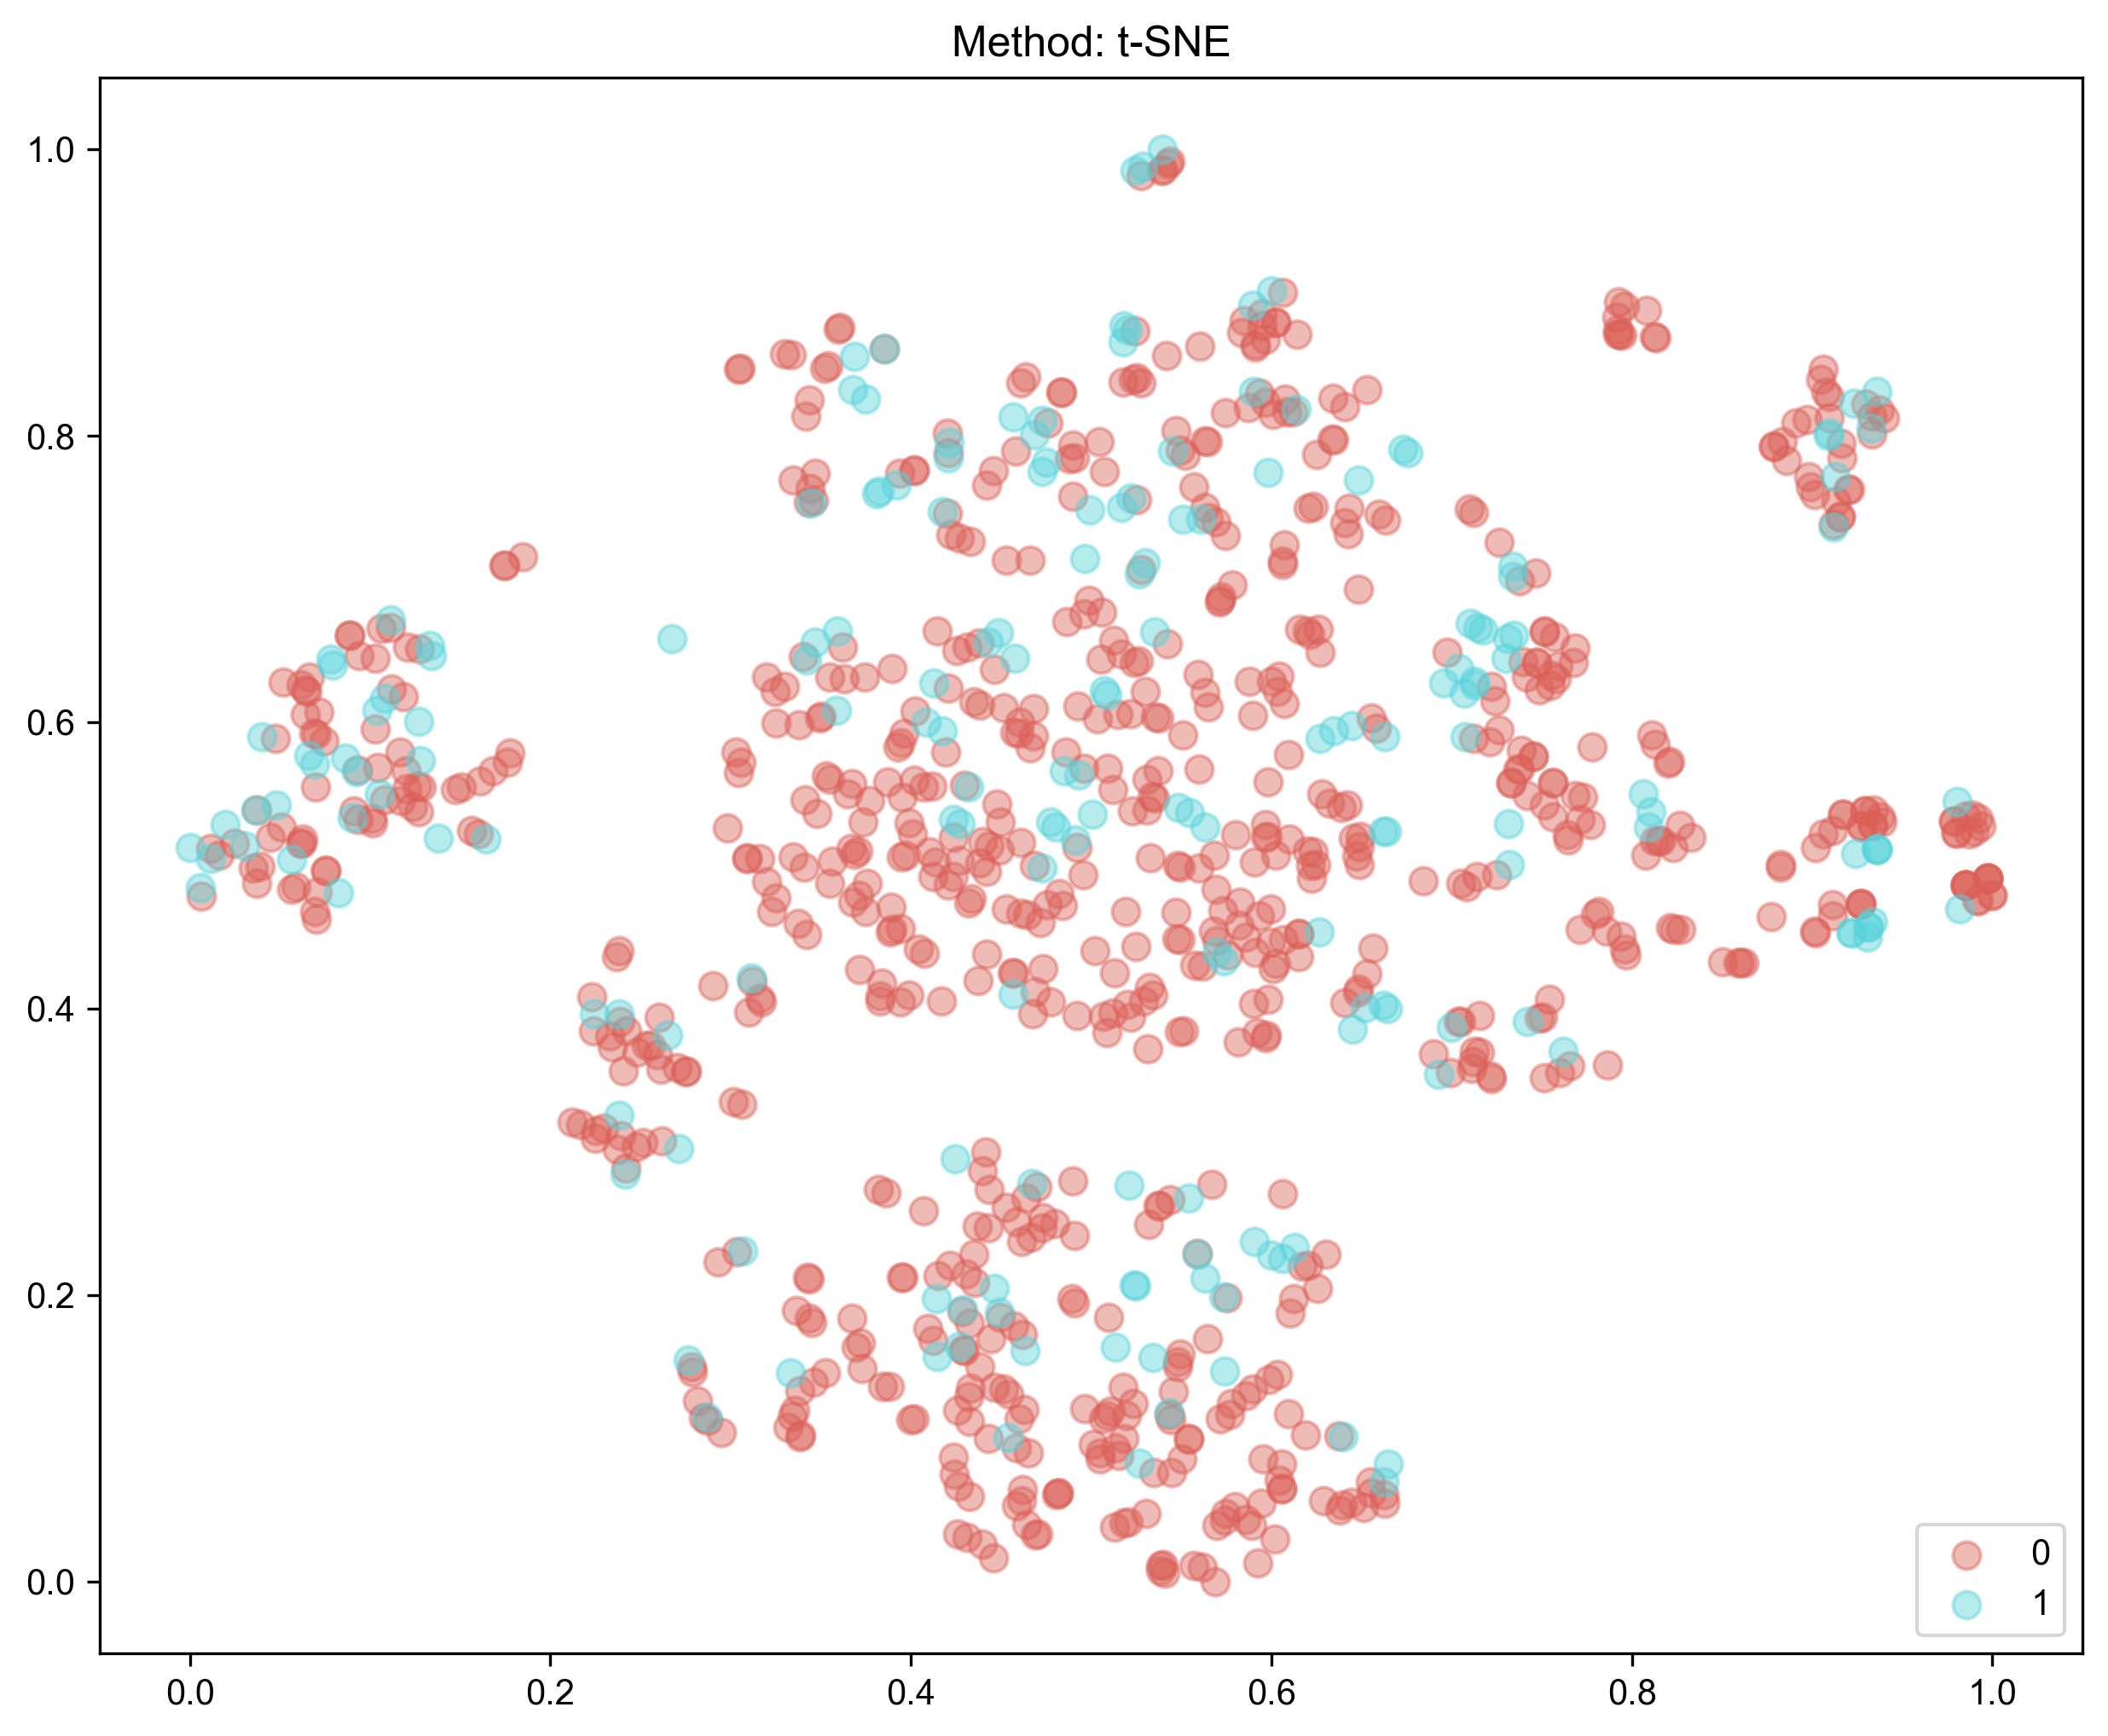

In [64]:
from comp1 import analysis_features
analysis_features(sel_data, data[labels[0]])

## 构建数据

将样本的训练数据X与监督信息y分离出来，并且对训练数据进行划分，一般的划分原则为80%-20%

**注意：**这个地方做交叉验证以及筛选特征的时候，如果数据量大可以使用`X_train`和`y_train`。

In [65]:
import numpy as np
from comp1 import split_dataset

n_classes = 2
y_data = sel_data[labels]
X_data = sel_data.drop(labels, axis=1)
column_names = X_data.columns

X_train, X_test, y_train, y_test = split_dataset(X_data, y_data, test_size=0.2, random_state=0)
print(f"训练集样本数：{X_train.shape}, 验证集样本数：{X_test.shape}")

训练集样本数：(800, 12), 验证集样本数：(200, 12)


### Lasso

初始化Lasso模型，alpha为惩罚系数。具体的参数文档可以参考：[文档](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso)

### 交叉验证

不同Lambda下的，特征的的权重大小。
```python
def lasso_cv_coefs(X_data, y_data, points=50, column_names: List[str] = None, **kwargs):
    """

    Args:
        X_data: 训练数据
        y_data: 监督数据
        points: 打印多少个点。默认50
        column_names: 列名，默认为None，当选择的数据很多的时候，建议不要添加此参数
        **kwargs: 其他用于打印控制的参数。

    """
 ```

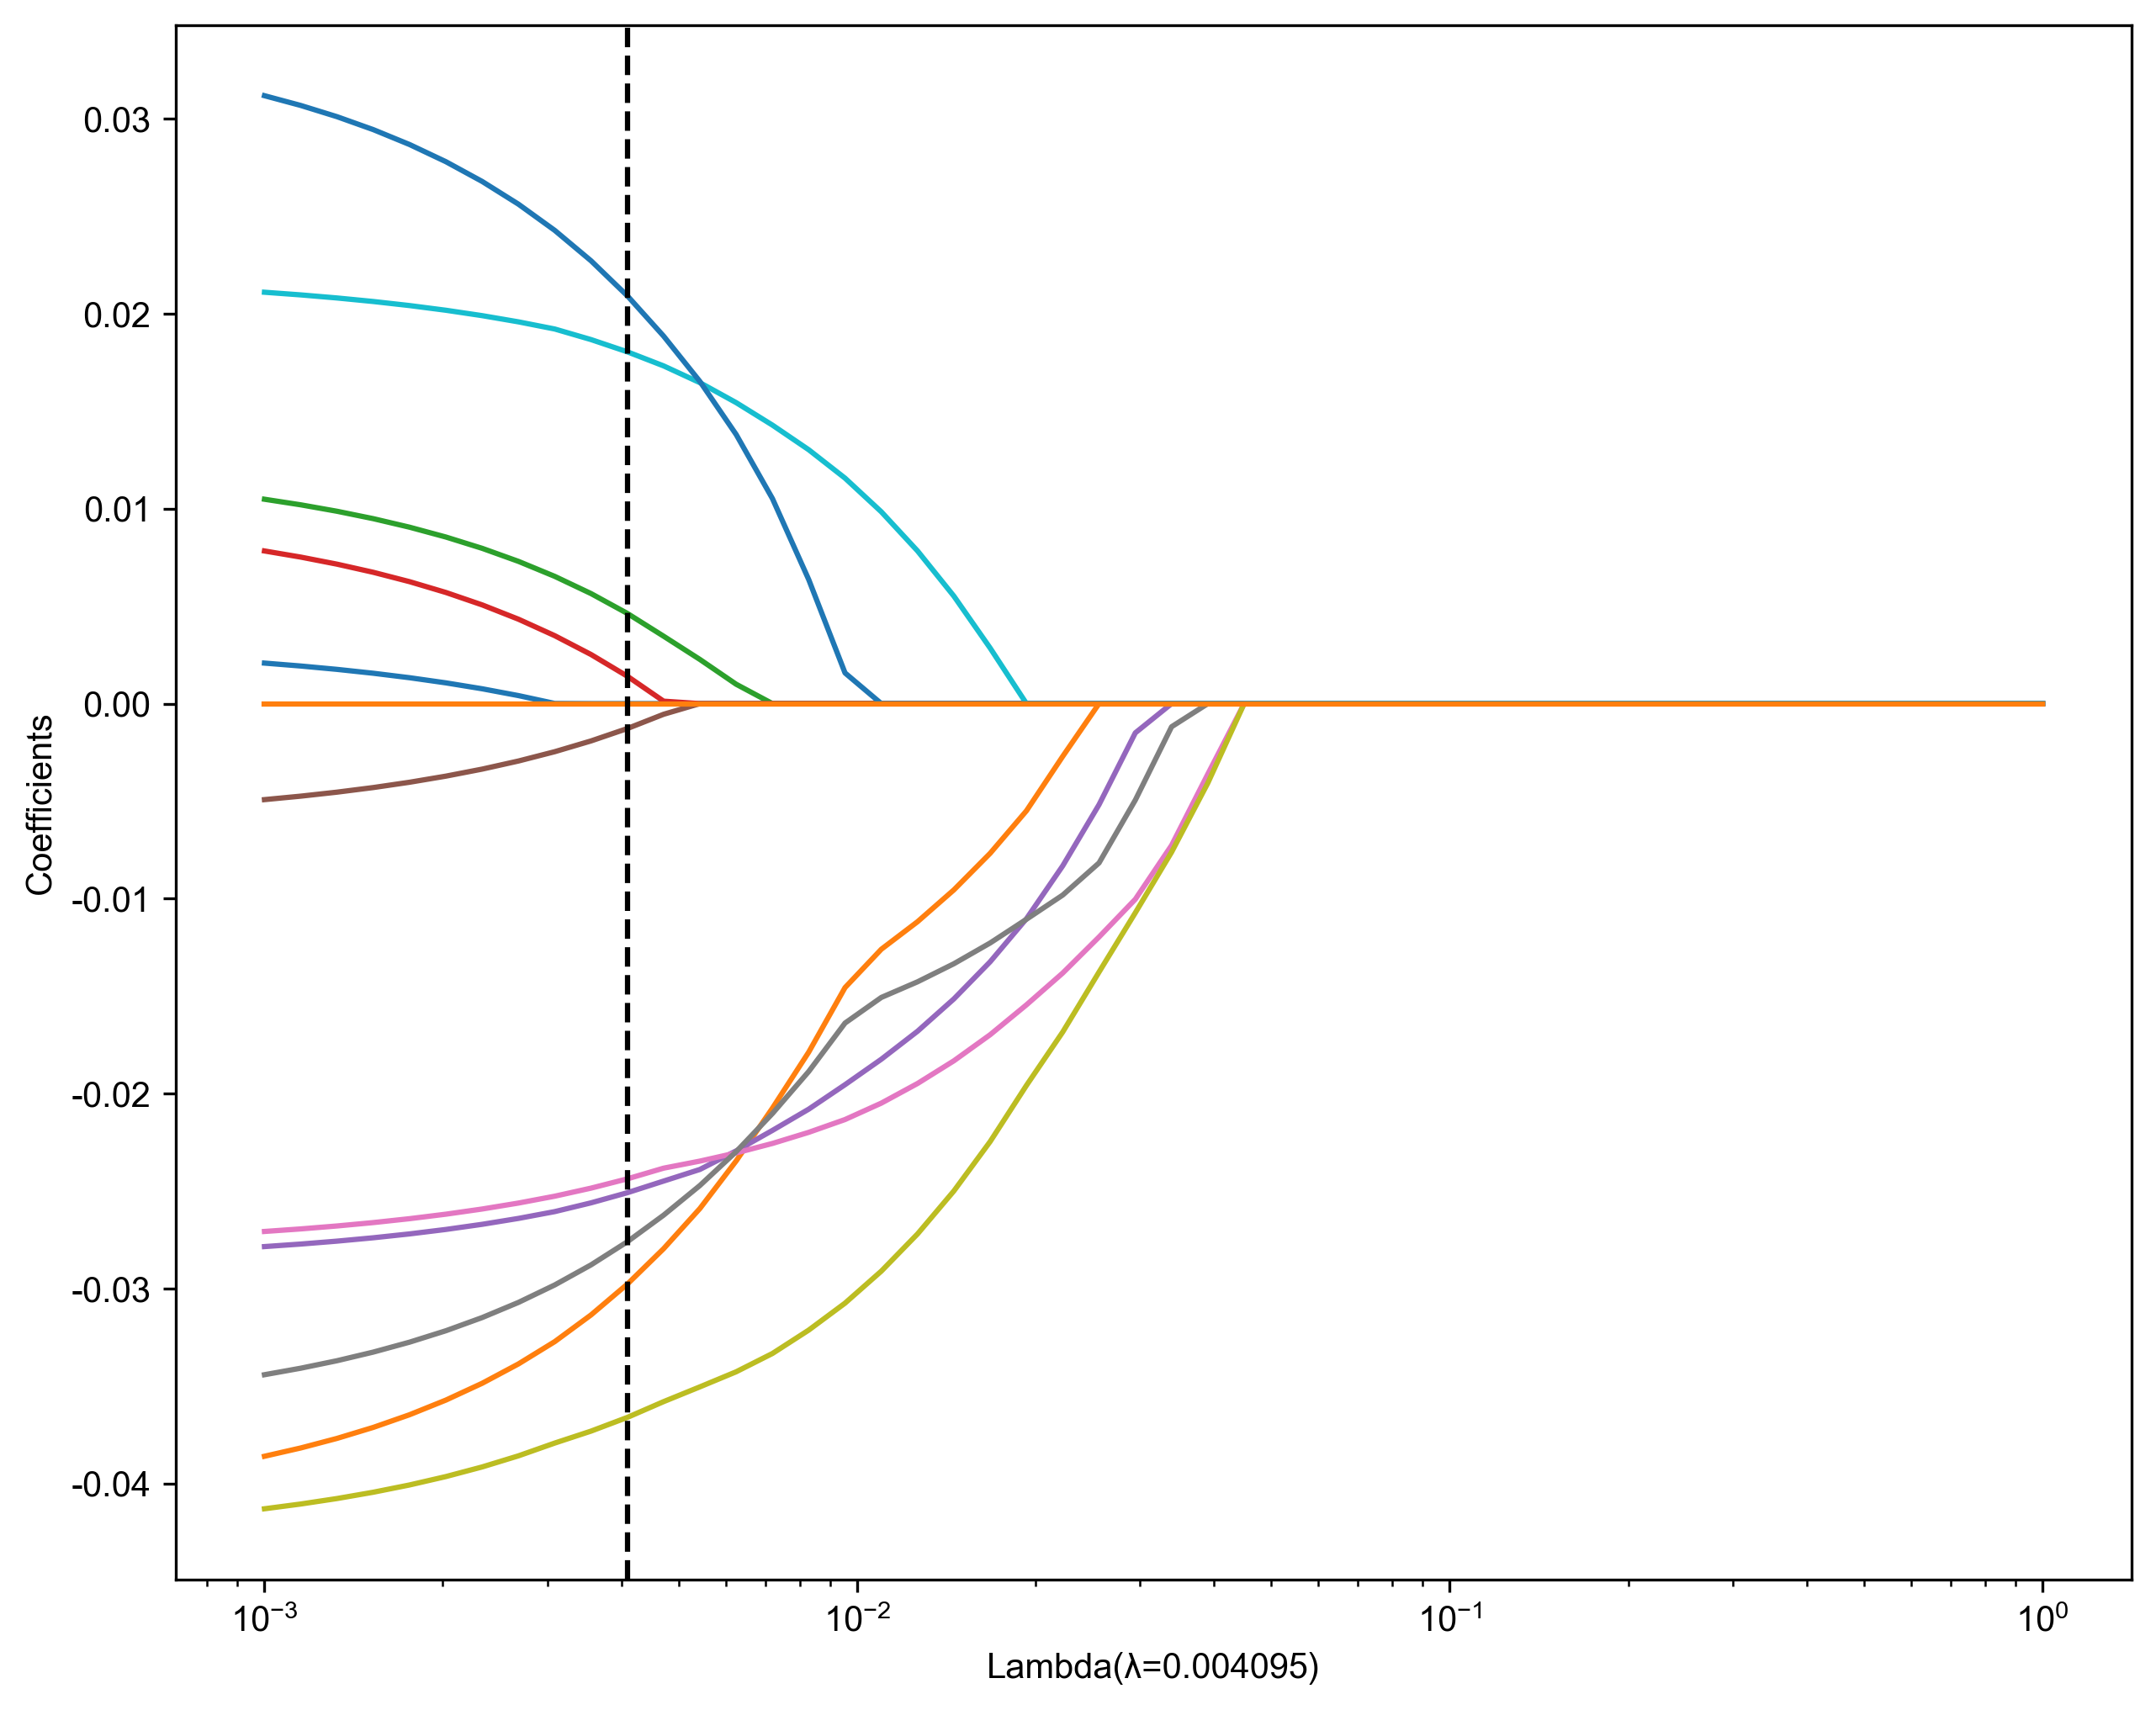

In [66]:
from comp1 import lasso_cv_coefs,lasso_cv_efficiency
alpha = lasso_cv_coefs(X_train, y_train, column_names=None)
# plt.savefig(f'img/feature_lasso.svg', bbox_inches = 'tight')

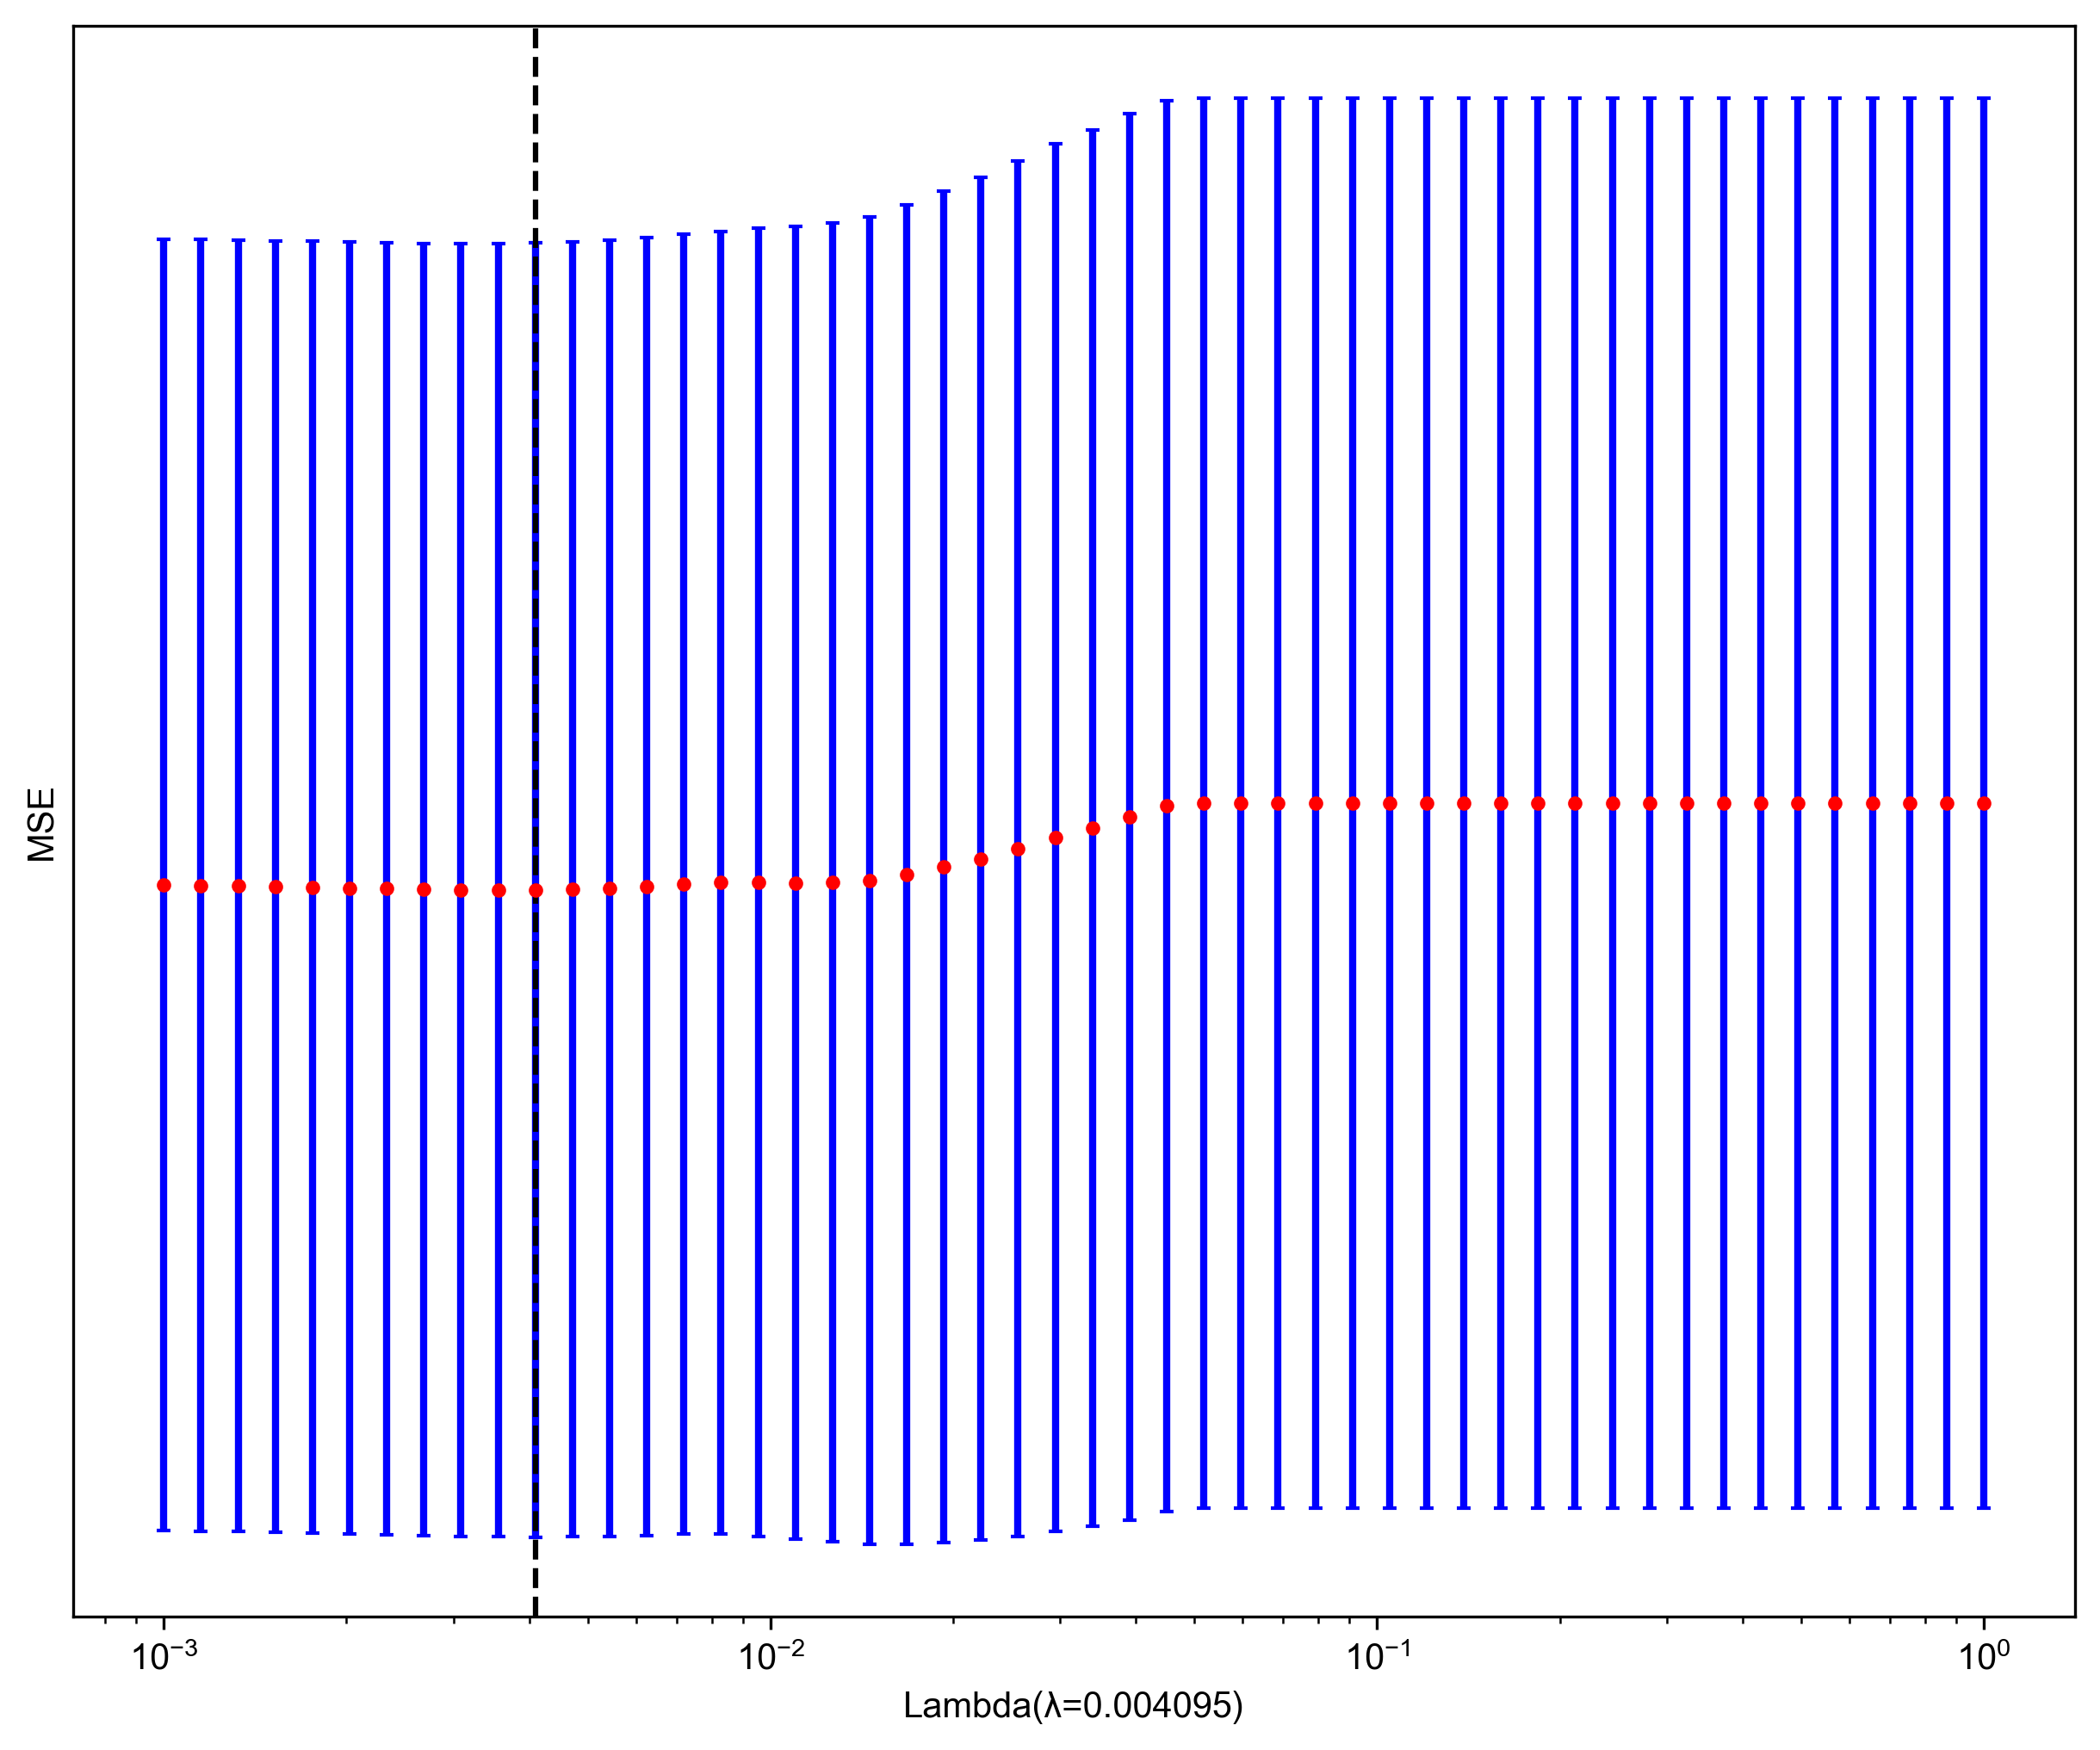

In [67]:
lasso_cv_efficiency(X_train, y_train, points=50)
# plt.savefig(f'img/feature_mse.svg', bbox_inches = 'tight')

## 模型筛选

根据筛选出来的数据，做模型的初步选择。当前主要使用到的是Onekey中的

1. SVM，支持向量机，引用参考。
2. KNN，K紧邻，引用参考。
3. Decision Tree，决策树，引用参考。
4. Random Forests, 随机森林，引用参考。
5. XGBoost, bosting方法。引用参考。
6. LightGBM, bosting方法，引用参考。

In [68]:
from comp1 import create_clf_model
model_names = ['SVM', 'KNN', 'RandomForest', 'ExtraTrees', 'XGBoost', 'LightGBM', 'NaiveBayes', 'AdaBoost', 'GradientBoosting', 'LR', 'MLP']
models = create_clf_model(model_names)
model_names = list(models.keys())
model_names

['LR',
 'NaiveBayes',
 'SVM',
 'KNN',
 'RandomForest',
 'ExtraTrees',
 'XGBoost',
 'LightGBM',
 'GradientBoosting',
 'AdaBoost',
 'MLP']

### 交叉验证

`n_trails`指定随机次数，每次采用的是80%训练，随机20%进行测试，找到最好的模型，以及对应的最好的数据划分。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'LR'),
  Text(1, 0, 'NaiveBayes'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'RandomForest'),
  Text(5, 0, 'ExtraTrees'),
  Text(6, 0, 'XGBoost'),
  Text(7, 0, 'LightGBM'),
  Text(8, 0, 'GradientBoosting'),
  Text(9, 0, 'AdaBoost'),
  Text(10, 0, 'MLP')])

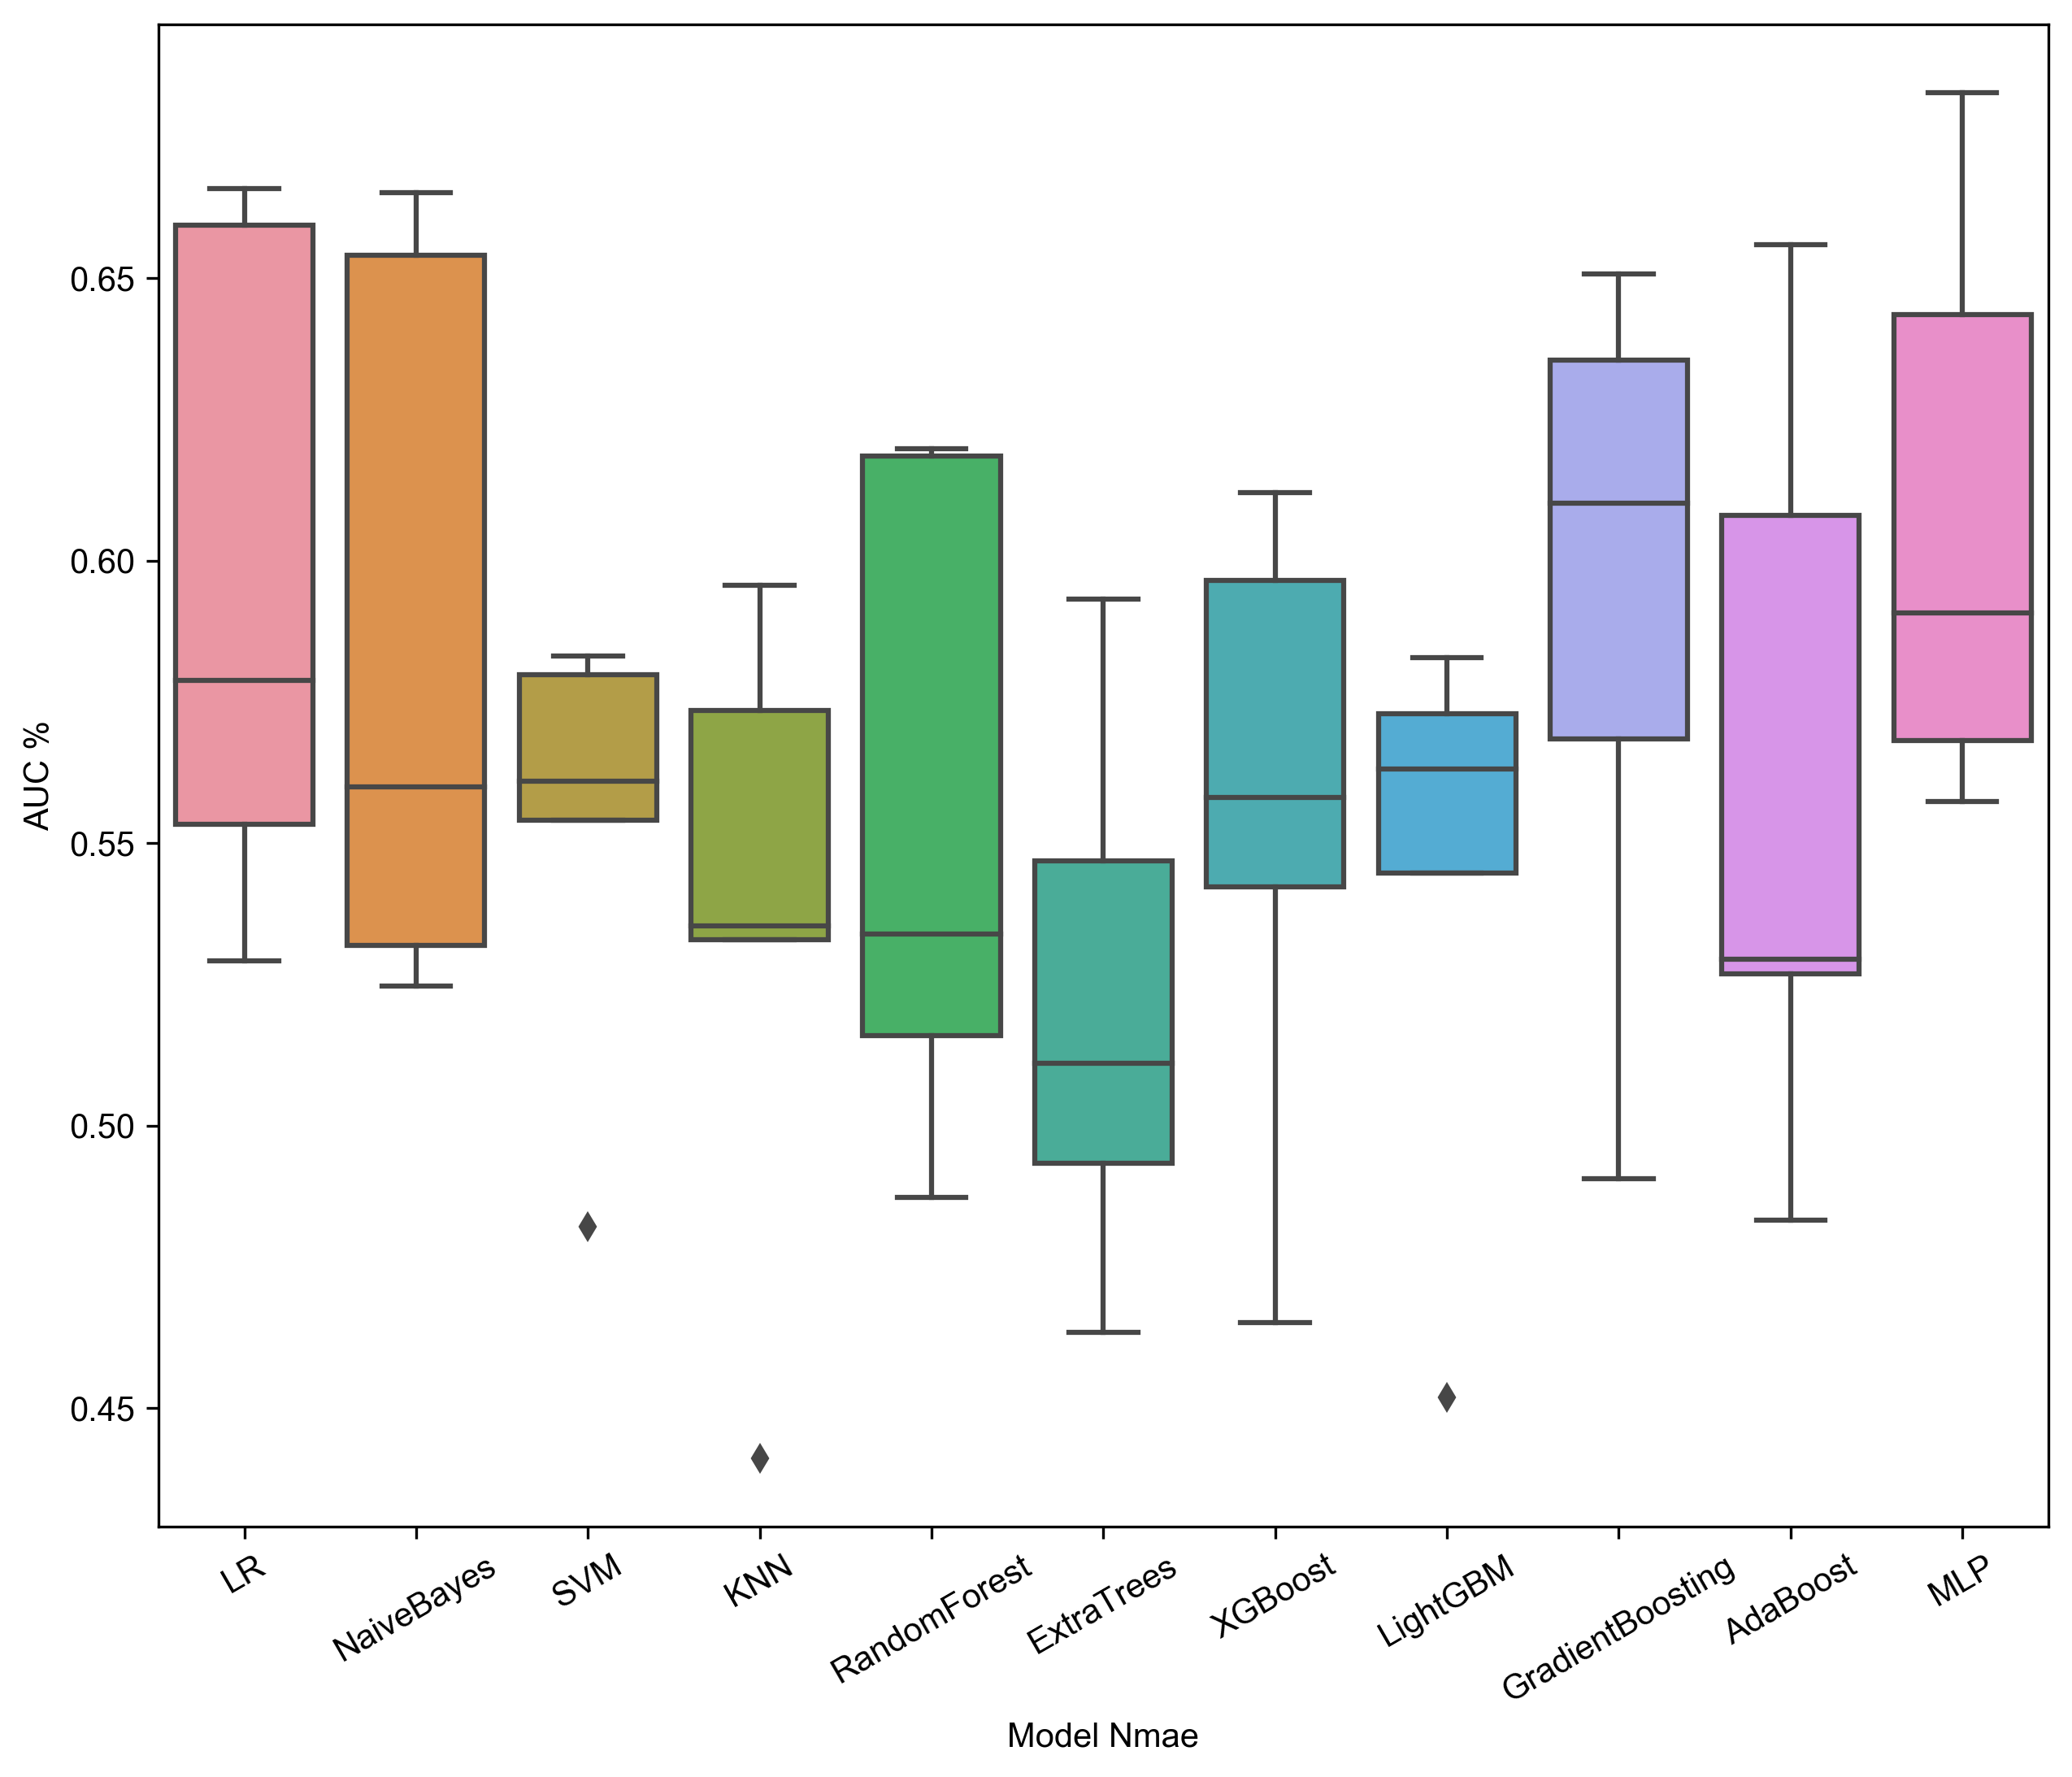

In [69]:
import seaborn as sns
import comp1
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# 随机使用n_trails次数据划分，找到最好的一次划分方法，并且保存在results中。
results = comp1.get_bst_split(X_data, y_data, models, test_size=0.2, metric_fn=roc_auc_score, n_trails=5, cv=True, random_state=0)
_, (X_train_sel, X_test_sel, y_train_sel, y_test_sel) = results['results'][results['max_idx']]
trails, _ = zip(*results['results'])
cv_results = pd.DataFrame(trails, columns=model_names)
# 可视化每个模型在不同的数据划分中的效果。
sns.boxplot(data=cv_results)
plt.ylabel('AUC %')
plt.xlabel('Model Nmae')
plt.xticks(rotation=30)
# plt.savefig(f'img/model_cv.svg', bbox_inches = 'tight')

## 模型筛选

使用最好的数据划分，进行后续的模型研究。

**注意**: 一般情况下论文使用的是随机划分的数据，但也有些论文使用【刻意】筛选的数据划分。

In [76]:
import joblib
import os
from comp1 import plot_feature_importance,create_clf_model
targets = []
os.makedirs('models', exist_ok=True)
for l in labels:
    new_models = list(create_clf_model(model_names).values())
    for mn, m in zip(model_names, new_models):
        m.fit(X_train_sel, y_train_sel[l])
        # 保存训练的模型
        joblib.dump(m, f'models/{mn}_{l}.pkl') 
        # 输出模型特征重要性，只针对高级树模型有用
        plot_feature_importance(m, selected_features[0], save_dir='img')
    targets.append(new_models)

NameError: name 'selected_features' is not defined

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from delong import calc_95_CI
from metrics import analysis_pred_binary

predictions = [[(model.predict(X_train_sel), model.predict(X_test_sel)) 
                for model in target] for label, target in zip(labels, targets)]
pred_scores = [[(model.predict_proba(X_train_sel), model.predict_proba(X_test_sel)) 
                for model in target] for label, target in zip(labels, targets)]

targets
# metric = []
# pred_sel_idx = []
# for label, prediction, scores in zip(labels, predictions, pred_scores):
#     pred_sel_idx_label = []
#     for mname, (train_pred, test_pred), (train_score, test_score) in zip(model_names, prediction, scores):
#         # 计算训练集指数
#         acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_train_sel[label], 
#                                                                                               train_score[:, 1])
#         ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
#         metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-train"))
                 
#         # 计算验证集指标
#         acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_test_sel[label], 
#                                                                                               test_score[:, 1])
#         ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
#         metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-test"))
#         # 计算thres对应的sel idx
#         pred_sel_idx_label.append(np.logical_or(test_score[:, 0] >= thres, test_score[:, 1] >= thres))
    
#     pred_sel_idx.append(pred_sel_idx_label)
# metric = pd.DataFrame(metric, index=None, columns=['model_name', 'Accuracy', 'AUC', '95% CI',
#                                                    'Sensitivity', 'Specificity', 
#                                                    'PPV', 'NPV', 'Precision', 'Recall', 'F1',
#                                                    'Threshold', 'Task'])
# metric

[]

#### 汇总所有模型

In [ ]:
sel_model = model_names

for pred_score, label in zip(pred_scores, labels):
    pred_test_scores = []
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            pred_test_scores.append(pred_score[sel_model_idx][1])
    okcomp.comp1.draw_roc([np.array(y_test_sel[label])] * len(pred_test_scores),
                          pred_test_scores,
                          labels=sel_model, title=f"Model AUC")
    plt.savefig(f'img/model_roc.svg', bbox_inches = 'tight')

### DCA 决策曲线

In [ ]:
from onekey_algo.custom.components.comp1 import plot_DCA

for pred_score, label in zip(pred_scores, labels):
    pred_test_scores = []
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            okcomp.comp1.plot_DCA(pred_score[sel_model_idx][1][:,1], np.array(y_test_sel[label]),
                                  title=f'Model {sm} DCA')
            plt.savefig(f'img/model_{sm}_dca.svg', bbox_inches = 'tight')

### 绘制混淆矩阵

绘制混淆矩阵，[混淆矩阵解释](https://baike.baidu.com/item/%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%98%B5/10087822?fr=aladdin)
`sel_model = ['SVM', 'KNN']`参数为想要绘制的模型对应的参数。

如果需要修改标签到名称的映射，修改`class_mapping={1:'1', 0:'0'}`

In [ ]:
# 设置绘制参数
sel_model = model_names
c_matrix = {}

for sm in sel_model:
    if sm in model_names:
        sel_model_idx = model_names.index(sm)
        for idx, label in enumerate(labels):
            cm = okcomp.comp1.calc_confusion_matrix(predictions[idx][sel_model_idx][-1], y_test_sel[label],
#                                                     sel_idx = pred_sel_idx[idx][sel_model_idx],
                                                    class_mapping={1:'1', 0:'0'}, num_classes=2)
            c_matrix[label] = cm
            plt.figure(figsize=(5, 4))
            plt.title(f'Model:{sm}')
            okcomp.comp1.draw_matrix(cm, norm=False, annot=True, cmap='Blues', fmt='.3g')
            plt.savefig(f'img/model_{sm}_cm.svg', bbox_inches = 'tight')

### 样本预测直方图

绘制每个样本的预测结果以及对应的真实结果, 图例中label=xx可以修改成自己类别的真实标签。

In [ ]:
sel_model = model_names
c_matrix = {}

for sm in sel_model:
    if sm in model_names:
        sel_model_idx = model_names.index(sm)
        for idx, label in enumerate(labels):
            okcomp.comp1.draw_predict_score(pred_scores[idx][sel_model_idx][-1], y_test_sel[label])
            plt.title(f'{sm} sample predict score')
            plt.legend(labels=["label=0","label=1"],loc="lower right")
            plt.savefig(f'img/model_{sm}_sample_dis.svg', bbox_inches = 'tight')
            plt.show()

## 保存模型结果

可以把模型预测的标签结果以及每个类别的概率都保存下来。

In [ ]:
import os
import numpy as np

os.makedirs('results', exist_ok=True)
sel_model = sel_model

for idx, label in enumerate(labels):
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            target = targets[idx][sel_model_idx]
            # 预测训练集和测试集数据。
            train_indexes = np.reshape(np.array(ids.loc[list(X_train_sel.index)]), (-1, 1)).astype(str)
            test_indexes = np.reshape(np.array(ids.loc[list(X_test_sel.index)]), (-1, 1)).astype(str)
            y_train_pred_scores = target.predict_proba(X_train_sel)
            y_test_pred_scores = target.predict_proba(X_test_sel)
            columns = ['ID'] + [f"{label}-{i}"for i in range(y_test_pred_scores.shape[1])]
            # 保存预测的训练集和测试集结果
            result_train = pd.DataFrame(np.concatenate([train_indexes, y_train_pred_scores], axis=1), columns=columns)
            result_train.to_csv(f'results/{sm}_train.csv', index=False)
            result_test = pd.DataFrame(np.concatenate([test_indexes, y_test_pred_scores], axis=1), columns=columns)
            result_test.to_csv(f'results/{sm}_test.csv', index=False)